# 实验任务

1. 针对以上提供的任意一个数据集，利用BP算法进行回归预测实验；
2. 要求BP算法的基本实现代码，由自己进行编写，以掌握BP算法流程；
3. 根据数据集自身特性， 调整选取合适的神经网络结构，例如：层数、神经元个数。
4. 可根据实验任务目标，采用合适的激活函数：Sigmoid、Relu、双曲…

# 数据读取

In [36]:
# 导入必要的库
import pandas as pd

# 读取数据
file_path = 'dataset/TESLA.csv'  # 数据文件路径
data = pd.read_csv(file_path)

# 打印数据的前几行以确认读取成功
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2021-09-29  259.933319  264.500000  256.893341  260.436676  260.436676   
1  2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
2  2021-10-01  259.466675  260.260010  254.529999  258.406677  258.406677   
3  2021-10-04  265.500000  268.989990  258.706665  260.510010  260.510010   
4  2021-10-05  261.600006  265.769989  258.066681  260.196655  260.196655   

     Volume  
0  62828700  
1  53868000  
2  51094200  
3  91449900  
4  55297800  


# 数据预处理

In [37]:
# 数据预处理
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 选择特征和目标列
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# 提取特征和目标值
X = data[features].values
y = data[target].values.reshape(-1, 1)

# 数据归一化
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# BP神经网络

In [38]:
# BP 神经网络实现
class BPNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # 初始化权重和偏置
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        error = y - output
        d_output = error * self.sigmoid_derivative(output)
        error_hidden = np.dot(d_output, self.W2.T)
        d_hidden = error_hidden * self.sigmoid_derivative(self.a1)

        # 更新权重和偏置
        self.W2 += np.dot(self.a1.T, d_output) * self.learning_rate
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * self.learning_rate
        self.W1 += np.dot(X.T, d_hidden) * self.learning_rate
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * self.learning_rate

# 训练模型

Epoch 0, Train Loss: 0.18152152460959683
Epoch 100, Train Loss: 0.0015799780192696183
Epoch 200, Train Loss: 0.0015009320305131386
Epoch 300, Train Loss: 0.0014648722427881566
Epoch 400, Train Loss: 0.0014380270382634344
Epoch 500, Train Loss: 0.0014139771130179397
Epoch 600, Train Loss: 0.001391429542875823
Epoch 700, Train Loss: 0.0013700856902017758
Epoch 800, Train Loss: 0.001349842460963161
Epoch 900, Train Loss: 0.001330636815112792
Epoch 1000, Train Loss: 0.0013124154396522696
Epoch 1100, Train Loss: 0.0012951287937307398
Epoch 1200, Train Loss: 0.0012787298838490473
Epoch 1300, Train Loss: 0.0012631739524070575
Epoch 1400, Train Loss: 0.0012484183430201135
Epoch 1500, Train Loss: 0.001234422402151626
Epoch 1600, Train Loss: 0.0012211473907365043
Epoch 1700, Train Loss: 0.0012085564008804319
Epoch 1800, Train Loss: 0.0011966142765858867
Epoch 1900, Train Loss: 0.0011852875381120574


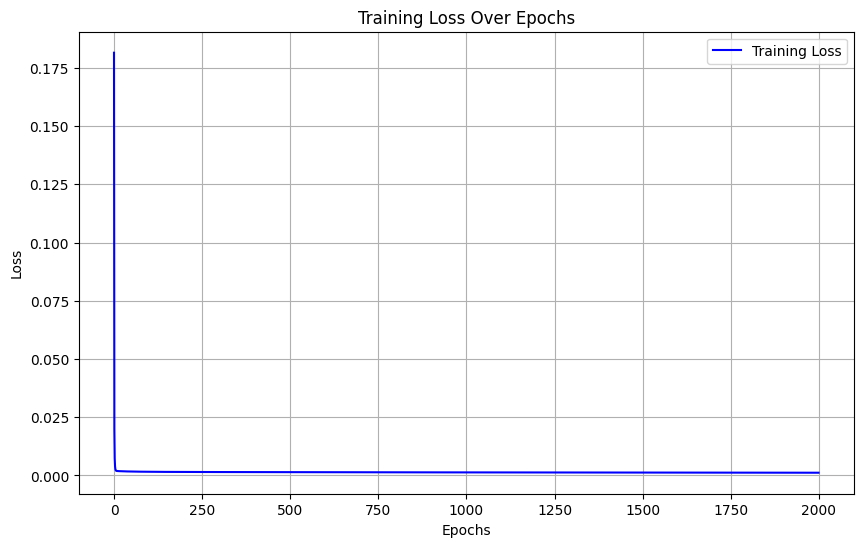

In [44]:
# 初始化 BP 神经网络
input_size = X_train.shape[1]
hidden_size = 50  # 隐藏层神经元个数，可调整
output_size = 1
learning_rate = 0.01

nn = BPNeuralNetwork(input_size, hidden_size, output_size, learning_rate)

# 训练模型
epochs = 2000
train_losses = []
test_losses = []

for epoch in range(epochs):
    # 前向传播（训练集）
    output_train = nn.forward(X_train)
    
    # 反向传播
    nn.backward(X_train, y_train, output_train)
    
    # 计算训练集损失
    train_loss = np.mean((y_train - output_train) ** 2)
    train_losses.append(train_loss)
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Train Loss: {train_loss}')

# 绘制 Loss 曲线
import matplotlib.pyplot as plt

# 绘制训练集 Loss 曲线
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_losses)), train_losses, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

# 测试和评估

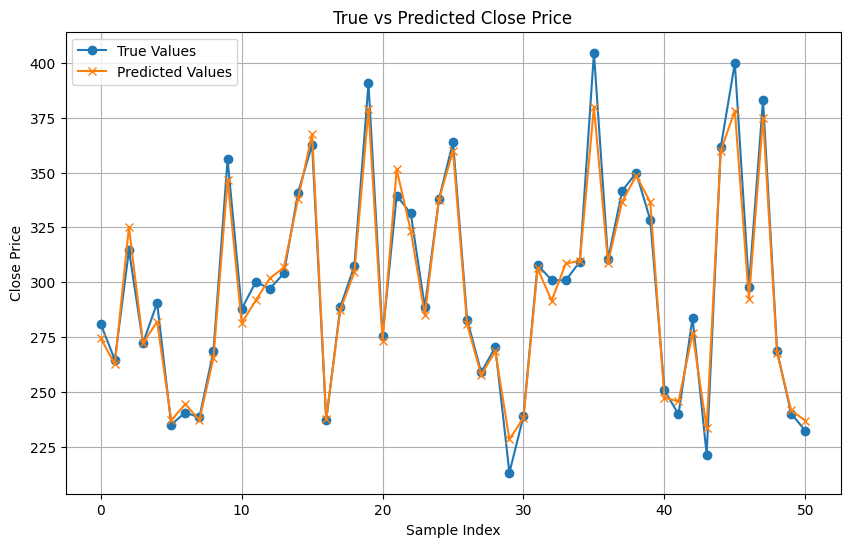

MSE: 55.828229605842175
RMSE: 7.471829066958249


In [45]:
# 测试模型
y_pred = nn.forward(X_test)

# 反归一化
y_test_original = scaler_y.inverse_transform(y_test)
y_pred_original = scaler_y.inverse_transform(y_pred)

# 可视化真实值和预测值
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_original)), y_test_original, label='True Values', marker='o')
plt.plot(range(len(y_pred_original)), y_pred_original, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.title('True vs Predicted Close Price')
plt.legend()
plt.grid()
plt.show()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')